# **Analysis**

In [1]:
'''
Loading the data and libraries
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


outlet_info = pd.read_csv('/content/drive/MyDrive/Question 5 - ML/outlet_info.csv')
outlet_info.head()

test_data = pd.read_csv('/content/drive/MyDrive/Question 5 - ML/test_data.csv')
test_data.head()

train_data = pd.read_csv('/content/drive/MyDrive/Question 5 - ML/training_data.csv')
train_data.head()

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,11/1/2021,Grocery,1.0,160.0,XYZ,16620,1475459.0
1,11/1/2021,Grocery,2.0,480.0,XYZ,32365,1475459.0
2,11/1/2021,Grocery,1.0,127.0,XYZ,31349,1475459.0
3,11/1/2021,Household,2.0,110.0,XYZ,1266,1475475.0
4,11/1/2021,Household,1.0,150.0,XYZ,114920,1475475.0


In [2]:
'''
Data Preprocessing
'''
train_data.info()
outlet_info.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614098 entries, 0 to 614097
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_id      614098 non-null  object 
 1   item_dept    614098 non-null  object 
 2   item_qty     614098 non-null  float64
 3   net_sales    614098 non-null  float64
 4   store        614098 non-null  object 
 5   item         614098 non-null  int64  
 6   invoice_num  591288 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 32.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   store    2 non-null      object
 1   profile  2 non-null      object
 2   size     2 non-null      object
dtypes: object(3)
memory usage: 176.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247624 entries, 0 to 247623
Data columns (total 7 columns):


In [ ]:
#describe net sales and itemqty
train_data['net_sales'].describe()

,net_sales
count,614098.000000
mean,335.067969
std,824.733169
min,-15250.000000
25%,124.000000
50%,215.000000
75%,371.000000
max,316880.280000


In [ ]:
train_data['item_qty'].describe()

,item_qty
count,614098.000000
mean,1.533792
std,3.058092
min,-59.000000
25%,1.000000
50%,1.000000
75%,1.668000
max,880.000000


In [ ]:
# Check for missing values

print(outlet_info.isnull().sum())
print(train_data.isnull().sum())
print(test_data.isnull().sum())

store      0
profile    0
size       0
dtype: int64
date_id            0
item_dept          0
item_qty           0
net_sales          0
store              0
item               0
invoice_num    22810
dtype: int64
date_id           0
item_dept         0
item_qty          0
net_sales         0
store             0
item              0
invoice_num    8305
dtype: int64


In [ ]:
#store unique

store = train_data['store'].unique()
store

array(['XYZ', 'ABC'], dtype=object)

In [ ]:
#item department unique

item_dept = train_data['item_dept'].unique()
item_dept

array(['Grocery', 'Household', 'Beverages'], dtype=object)

In [ ]:
#which month it has been listed in train data

train_data['date_id'] = pd.to_datetime(train_data['date_id'])

# Extract the month from the date_id column
train_data['month'] = train_data['date_id'].dt.month

# Find the unique months
unique_months = train_data['month'].unique()
unique_months


array([11, 12,  1], dtype=int32)

In [ ]:
#which month it has been listed in test data

test_data['date_id'] = pd.to_datetime(test_data['date_id'])

# Extract the month from the date_id column
test_data['month'] = test_data['date_id'].dt.month

# Find the unique months
unique_months = test_data['month'].unique()
unique_months

array([2], dtype=int32)

In [ ]:
#number of unique item in the store
unique_items_per_store = train_data.groupby('store')['item'].nunique().reset_index()
unique_items_per_store.columns = ['store', 'unique_item_count']

print(unique_items_per_store)

  store  unique_item_count
0   ABC               5041
1   XYZ               4126


In [ ]:
# Identify rows with negative item quantities
negative_qty = train_data[train_data['item_qty'] < 0]

# Identify rows with negative net sales
negative_sales = train_data[train_data['net_sales'] < 0]

negative_qty
negative_sales

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num,month
165,2021-11-09,Grocery,-2.000,-310.000,XYZ,22344,1477390.0,11
166,2021-11-09,Grocery,-1.000,-145.000,XYZ,111698,1477390.0,11
310,2021-11-13,Beverages,-1.000,-500.000,XYZ,3266,1478124.0,11
428,2021-11-20,Household,-1.000,-320.000,XYZ,120471,1479525.0,11
1130,2021-12-19,Beverages,-1.000,-460.000,XYZ,122190,1486337.0,12
...,...,...,...,...,...,...,...,...
611232,2021-12-09,Household,-1.000,-270.000,XYZ,112857,5591853.0,12
612273,2022-01-04,Grocery,-5.014,-676.890,XYZ,3235,5597914.0,1
613338,2022-01-31,Beverages,-1.000,-320.000,XYZ,112362,5603836.0,1
613874,2021-11-24,Household,-2.000,-700.000,ABC,119446,5806445.0,11


In [ ]:
# Group by store and department to see where negative quantities occur most
negative_qty_by_store_dept = negative_qty.groupby(['store', 'item_dept']).size().reset_index(name='count')

print(negative_qty_by_store_dept.sort_values(by='count', ascending=False).head())


  store  item_dept  count
4   XYZ    Grocery    169
1   ABC    Grocery    147
2   ABC  Household    125
5   XYZ  Household    115
3   XYZ  Beverages     93


In [ ]:
# Merge train and outlet_info datasets on the 'store' column
merged_data = pd.merge(train_data, outlet_info, on='store', how='left')

# Inspect the merged dataset
print(merged_data.head())


     date_id  item_dept  item_qty  net_sales store    item  invoice_num  \
0 2021-11-01    Grocery       1.0      160.0   XYZ   16620    1475459.0   
1 2021-11-01    Grocery       2.0      480.0   XYZ   32365    1475459.0   
2 2021-11-01    Grocery       1.0      127.0   XYZ   31349    1475459.0   
3 2021-11-01  Household       2.0      110.0   XYZ    1266    1475475.0   
4 2021-11-01  Household       1.0      150.0   XYZ  114920    1475475.0   

   month profile   size  
0     11    High  Large  
1     11    High  Large  
2     11    High  Large  
3     11    High  Large  
4     11    High  Large  


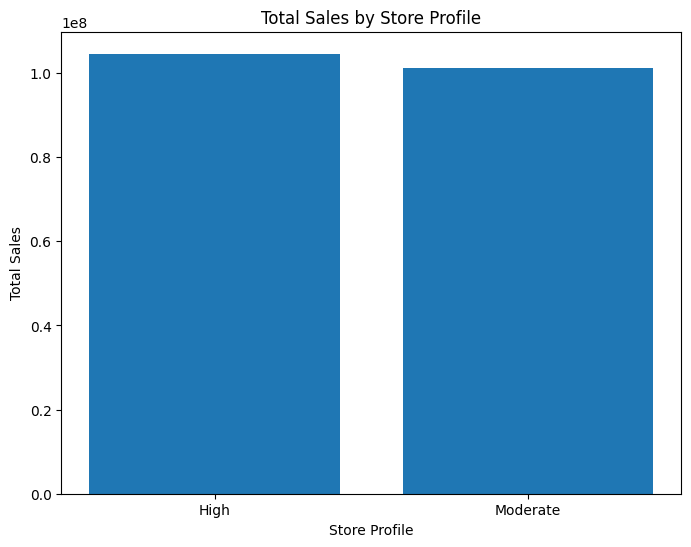

In [ ]:
# Group by store profile and calculate total sales
profile_sales = merged_data.groupby('profile')['net_sales'].sum().reset_index()

# Visualize sales by store profile
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(profile_sales['profile'], profile_sales['net_sales'])
plt.title('Total Sales by Store Profile')
plt.xlabel('Store Profile')
plt.ylabel('Total Sales')
plt.show()


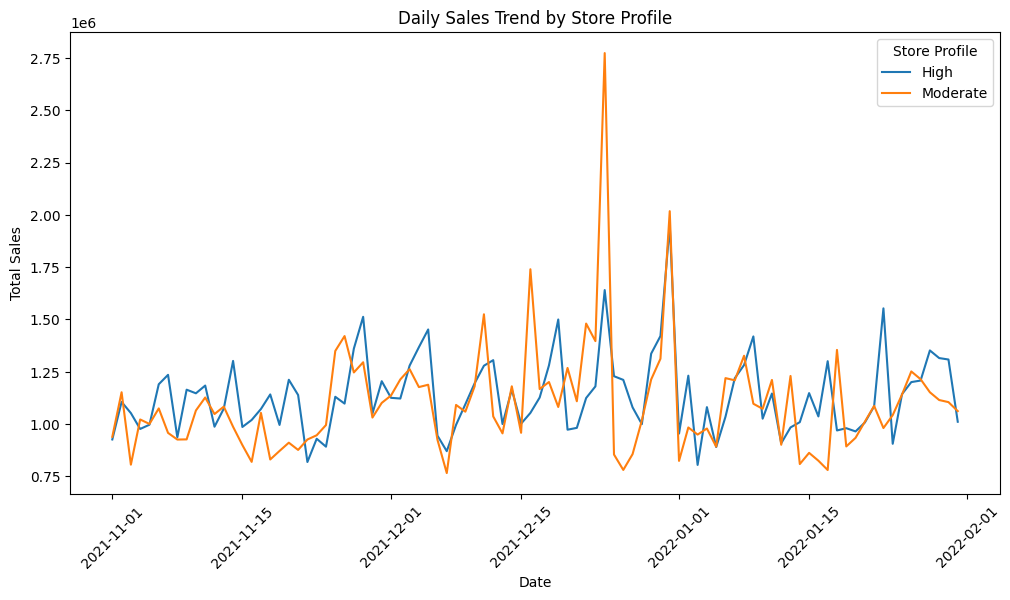

In [ ]:
# Group by date and store profile, then calculate total sales
time_profile_sales = merged_data.groupby(['date_id', 'profile'])['net_sales'].sum().reset_index()

# Plot time-series sales trends by store profile
plt.figure(figsize=(12, 6))

for profile in time_profile_sales['profile'].unique():
    profile_data = time_profile_sales[time_profile_sales['profile'] == profile]
    plt.plot(profile_data['date_id'], profile_data['net_sales'], label=profile)

plt.title('Daily Sales Trend by Store Profile')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title="Store Profile")
plt.xticks(rotation=45)
plt.show()



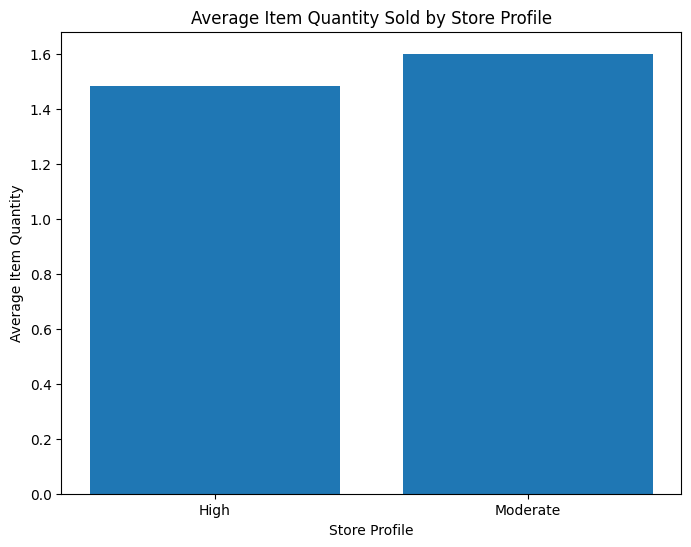

In [ ]:
# Group by store profile and calculate average item quantity
profile_item_qty = merged_data.groupby('profile')['item_qty'].mean().reset_index()

# Visualize the average item quantity by store profile
plt.figure(figsize=(8, 6))
plt.bar(profile_item_qty['profile'], profile_item_qty['item_qty'])
plt.title('Average Item Quantity Sold by Store Profile')
plt.xlabel('Store Profile')
plt.ylabel('Average Item Quantity')
plt.show()


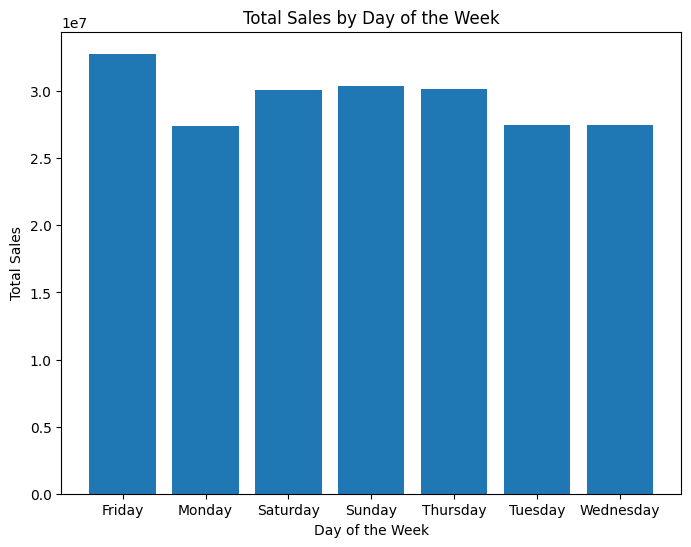

In [ ]:
# Add a column for the day of the week
merged_data['day_of_week'] = merged_data['date_id'].dt.day_name()

# Sales by day of the week
day_sales = merged_data.groupby('day_of_week')['net_sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(day_sales['day_of_week'], day_sales['net_sales'])
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


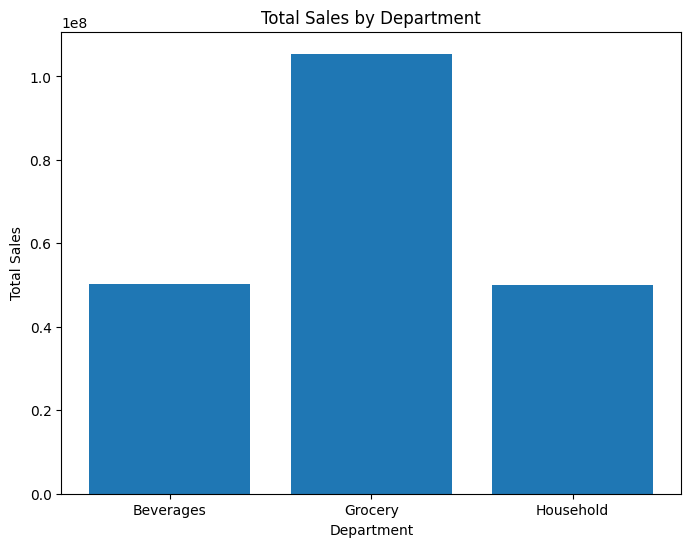

In [ ]:
# Sales by department
dept_sales = merged_data.groupby('item_dept')['net_sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(dept_sales['item_dept'], dept_sales['net_sales'])
plt.title('Total Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()

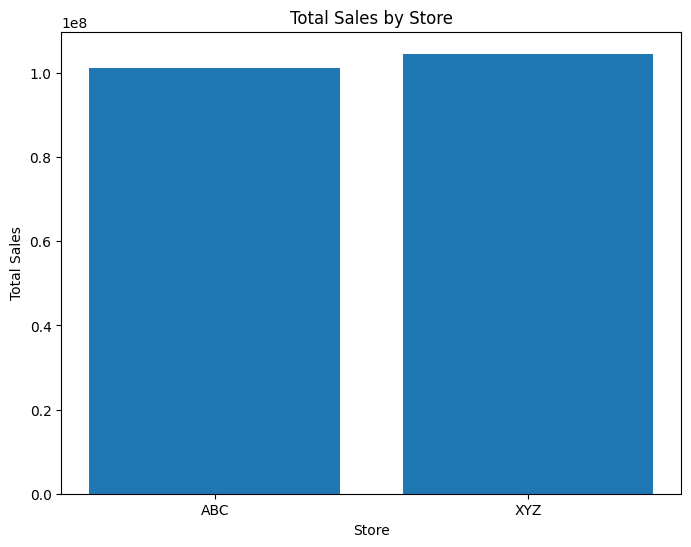

In [ ]:
# Sales by store
store_sales = merged_data.groupby('store')['net_sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(store_sales['store'], store_sales['net_sales'])
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

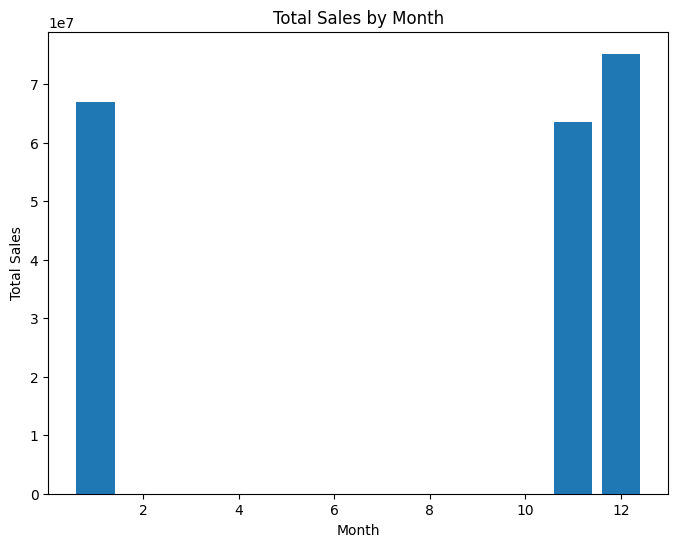

In [ ]:
merged_data['month'] = merged_data['date_id'].dt.month

# Sales by month
month_sales = merged_data.groupby('month')['net_sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(month_sales['month'], month_sales['net_sales'])
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


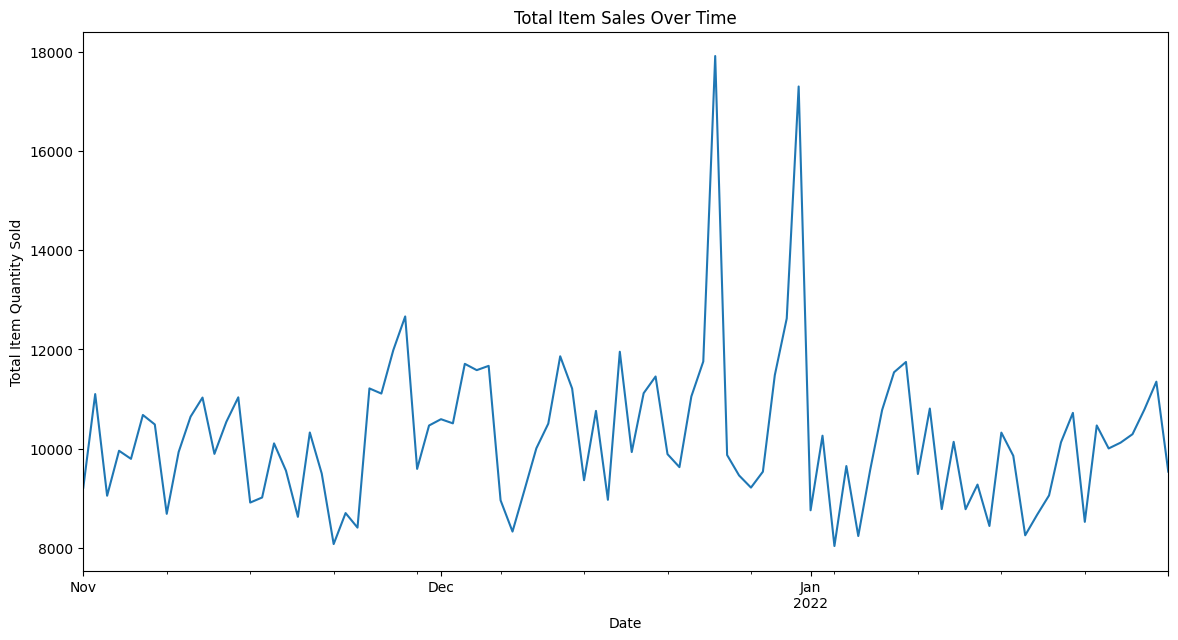

In [ ]:
# Time Series Plot to visualize trends and seasonality
merged_data['date_id'] = pd.to_datetime(merged_data['date_id'])
time_series_data = merged_data.groupby('date_id')['item_qty'].sum()

plt.figure(figsize=(14, 7))
time_series_data.plot()
plt.title('Total Item Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Item Quantity Sold')
plt.show()

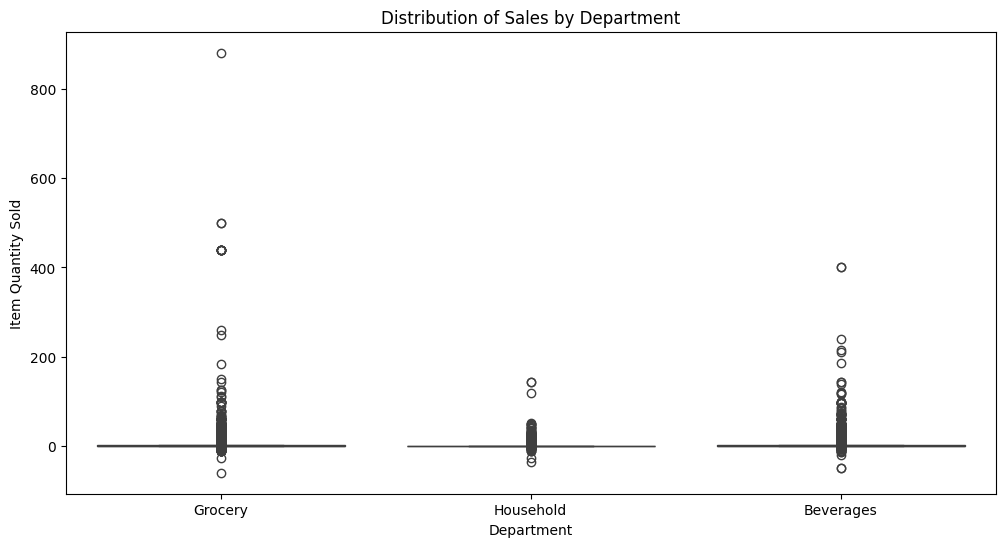

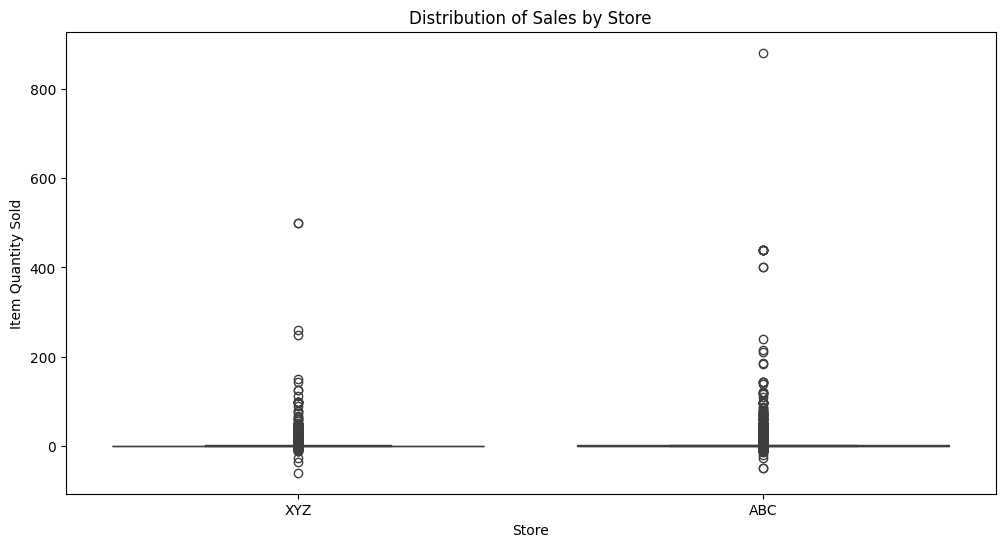

In [ ]:
# Box Plot to compare sales distributions across different stores and departments
plt.figure(figsize=(12, 6))
sns.boxplot(x='item_dept', y='item_qty', data=merged_data)
plt.title('Distribution of Sales by Department')
plt.xlabel('Department')
plt.ylabel('Item Quantity Sold')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='item_qty', data=merged_data)
plt.title('Distribution of Sales by Store')
plt.xlabel('Store')
plt.ylabel('Item Quantity Sold')
plt.show()


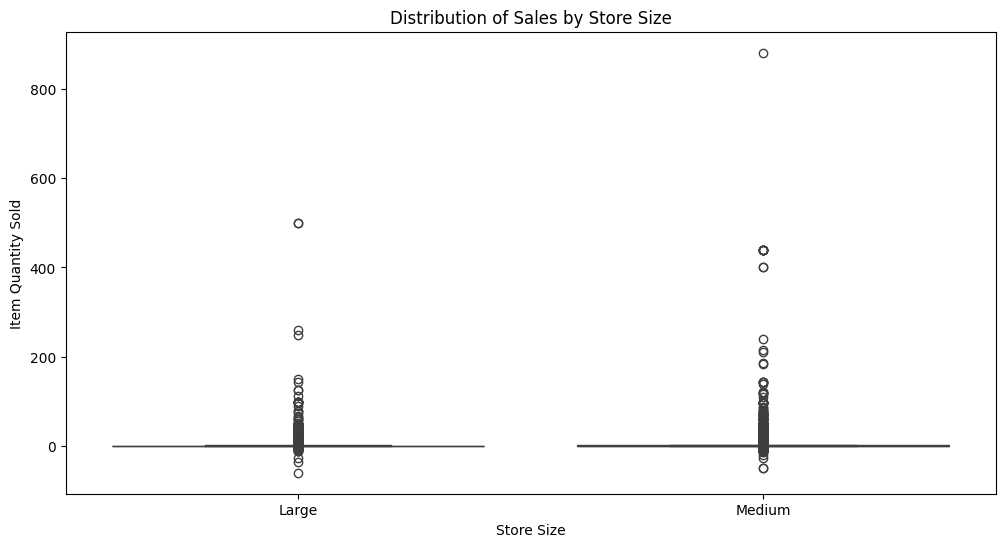

In [ ]:
# Box Plot to compare sales based on store size
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', y='item_qty', data=merged_data)
plt.title('Distribution of Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Item Quantity Sold')
plt.show()


In [ ]:
from scipy import stats

anova_result = stats.f_oneway(
    merged_data[merged_data['store'] == 'XYZ']['item_qty'],
    merged_data[merged_data['store'] == 'ABC']['item_qty']
)
print('ANOVA Test Result between Store XYZ and ABC:', anova_result)



ANOVA Test Result between Store XYZ and ABC: F_onewayResult(statistic=229.72669354938836, pvalue=6.988044545180972e-52)


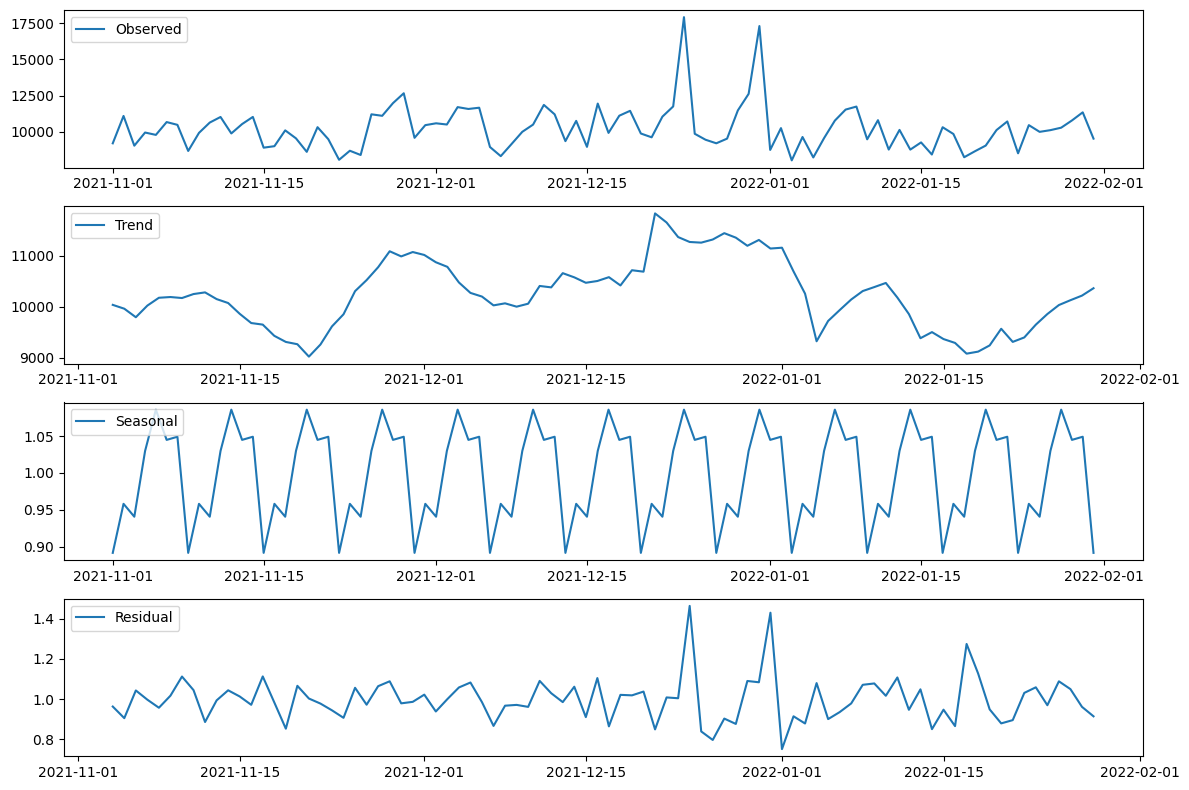

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the datasets
training_data = pd.read_csv('/content/drive/MyDrive/Question 5 - ML/training_data.csv')
# Preprocess the data
training_data['date_id'] = pd.to_datetime(training_data['date_id'])

# Aggregate sales data by date
time_series_data = training_data.groupby('date_id')['item_qty'].sum()

# Decompose the time series
decomposition = seasonal_decompose(time_series_data, model='multiplicative', period=7)  # Weekly seasonality

# Plotting the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
# Merge train and outlet_info datasets on the 'store' column
merged_data_test = pd.merge(test_data, outlet_info, on='store', how='left')

# Inspect the merged dataset
print(merged_data_test.head())

    date_id  item_dept  item_qty  net_sales store    item  invoice_num  \
0  2/1/2022  Beverages       2.0      480.0   XYZ  112360    1495518.0   
1  2/1/2022  Beverages       1.0      202.0   XYZ  111195    1495518.0   
2  2/1/2022  Household       1.0      165.0   XYZ   41212    1495572.0   
3  2/1/2022  Household       2.0      480.0   XYZ  123476    1495572.0   
4  2/1/2022    Grocery       2.0      660.0   XYZ  106668    1495572.0   

  profile   size  
0    High  Large  
1    High  Large  
2    High  Large  
3    High  Large  
4    High  Large  


In [7]:
# Group by date, store, and department, then calculate total sales
time_profile_sales = test_data.groupby(['date_id', 'department'])['net_sales'].sum().reset_index()

# Plot time-series sales trends by store and department
plt.figure(figsize=(14, 7))

# Iterate over unique stores
for store in time_profile_sales['profile'].unique():
    store_data = time_profile_sales[time_profile_sales['profile'] == store]

    # Iterate over unique departments within the store
    for department in store_data['department'].unique():
        department_data = store_data[store_data['department'] == department]
        plt.plot(department_data['date_id'], department_data['net_sales'], label=f'{store} - {department}')

plt.title('Daily Sales Trend by Store and Department')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title="Store - Department", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'profile'